In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.**


In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

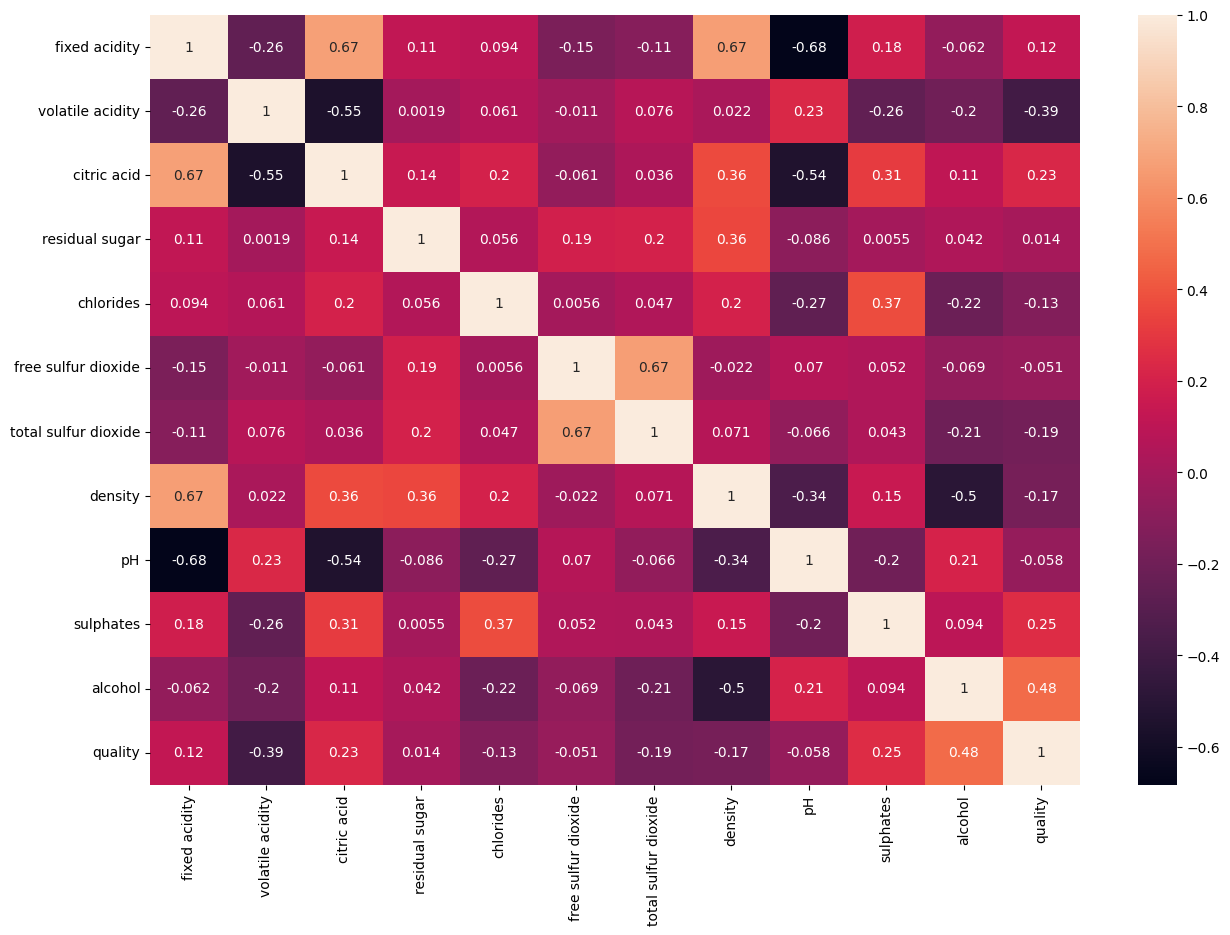

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),annot=True)

**Following are the relation between wine quality and different features:-**  
- alcohol : Intermediate Positive correlation (Higher the alcohol content, higher the quality of wine)
- sulphates : Positive correlation (Higher the sulphate content in wine, higher the quality of wine)
- pH : Weak negative correlation (Lower the pH of red wine, higher is the quality of red wine and vice-versa)
- density : Weak negative correaltion (Lower the density of red wine, higher is the quality of red wine and vice versa)
- total sulfur dioxide : Weak negative correaltion (Lower the total sulfur dioxide content, higher is the quality of red wine and vice versa)
- free sulfur dioxide : Weak negative correaltion (Lower the free sulfur dioxide content, higher is the quality of red wine and vice versa)
- chlorides : Weak negative correlation (Lower the chloride content, higher is the quality of red wine and vice versa)
- residual sugar : Weak Positive realtion (Higher the residual sugar content, higher the quality of red wine)
- citric acid : Positive correlation (Higher the residual citric acid, higher the quality of red wine)
- volatile acidity : Intermediate Negative correlation (Lower the volatile acidity, higher is the quality of red wine and vice versa)
- fixed acidity : Weak Positive correlation (Higher the fixed acidity, higher the quality of red wine)

**Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.**

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In red wine dataset, we don't have any missing values present.

Various imputation techniques used to handle missing data are:-
1) Mean Imputation  
    -Advantages:-  
        1) Simple and quick to implement.  
        2) Preserves the original sample size.  
    -Disadvantages:-  
        1) Ignores relationships between variables.  
        2) May not be suitable for categorical data.  
        3) Can introduce bias if missing data is not missing completely at random (MCAR).  
2) Median Imputation  
    -Advantages:-  
        1) Simple and quick to implement.  
        2) Preserves the original sample size.  
    -Disadvantages:-  
        1) Ignores relationships between variables.  
        2) May not be suitable for categorical data.  
        3) Can introduce bias if missing data is not missing completely at random (MCAR).  
3) Mode Imputation  
    -Advantages:  
        1) Applicable to categorical variables.  
        2) Preserves the original sample size.  
    -Disadvantages:  
        1)Ignores relationships between variables.  
        2) May not be suitable for ordinal data.

**Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?**

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isnull().sum() # No null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum() # No duplicate rows

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<Axes: >

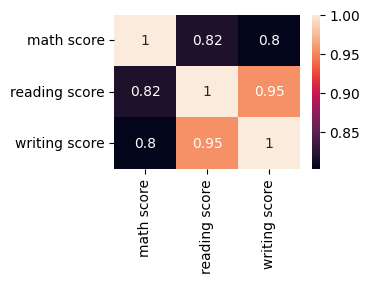

In [19]:
plt.figure(figsize=(3,2))
sns.heatmap(df.corr(numeric_only=True),annot=True)

- 'math score', 'reading score' and 'writing score' are highly overall correlated.

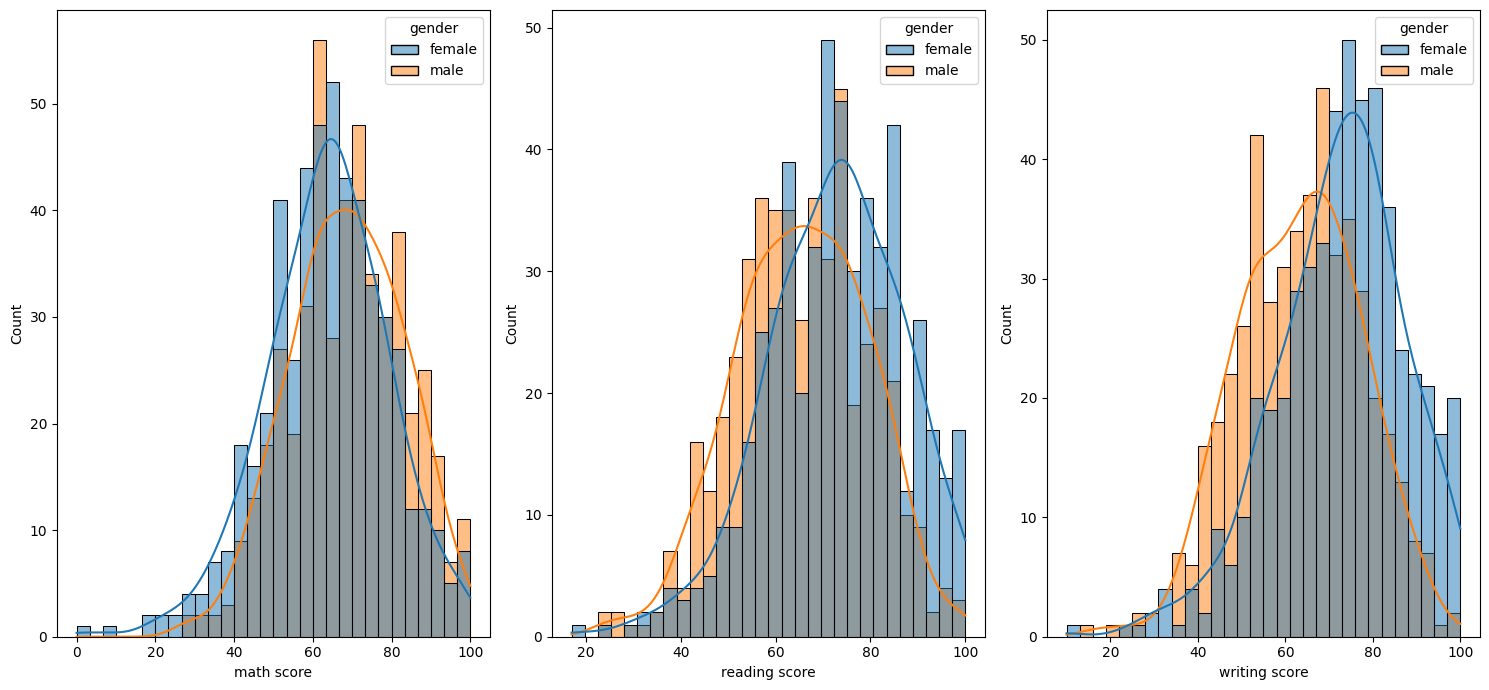

In [21]:
fig,axis = plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='math score',bins=30,kde=True,color='g',hue='gender')
plt.subplot(132)
sns.histplot(data=df,x='reading score',bins=30,kde=True,color='r',hue='gender')
plt.subplot(133)
sns.histplot(data=df,x='writing score',bins=30,kde=True,hue='gender')
plt.tight_layout()
plt.show()


- 'gender' is slighlty correlated to the scores.
- Histogram for 'writing score' is a bit more left skewed for female students as compared for male students.
- Overall performance of female students is better as compared to male students.

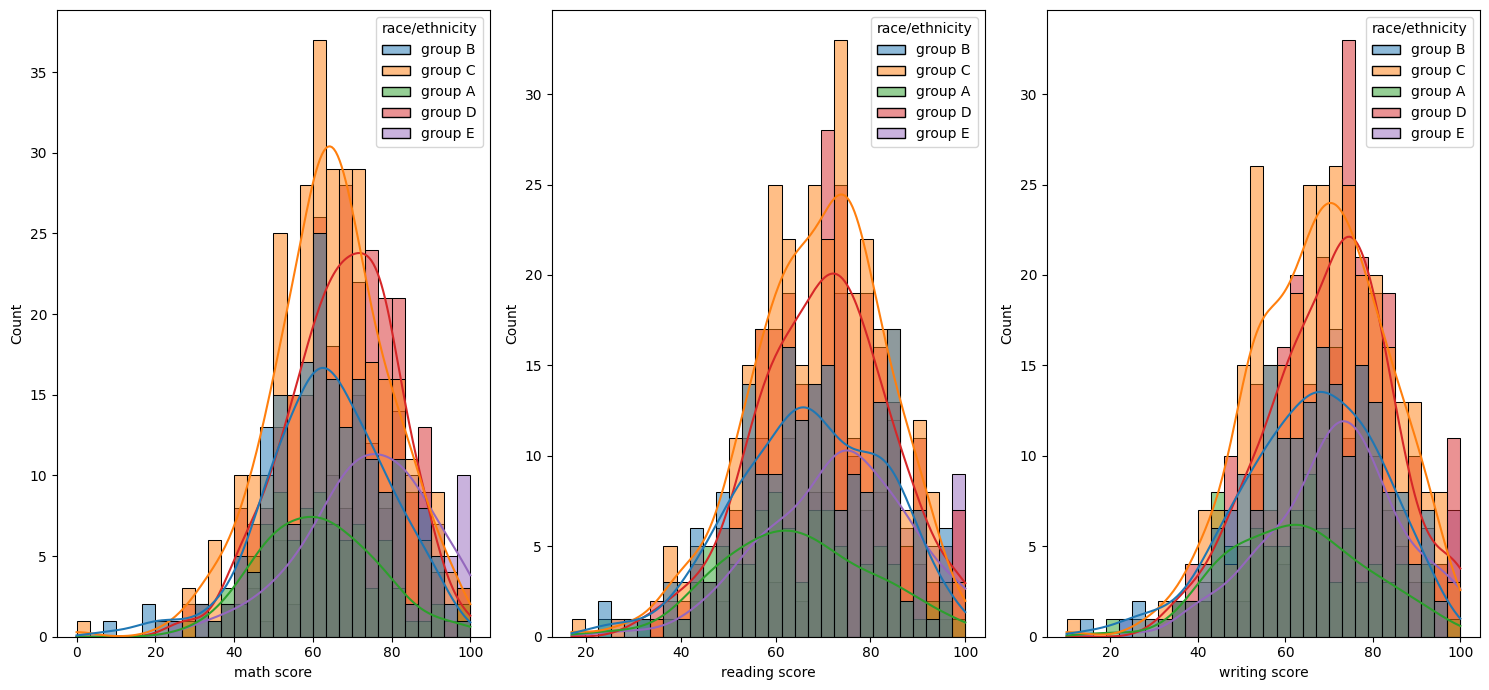

In [22]:
fig,axis = plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='math score',bins=30,kde=True,color='g',hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df,x='reading score',bins=30,kde=True,color='r',hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df,x='writing score',bins=30,kde=True,hue='race/ethnicity')
plt.tight_layout()
plt.show()

- Overall performance of people of group A and group B is poor.
- Overall performance of group E and group D is good.

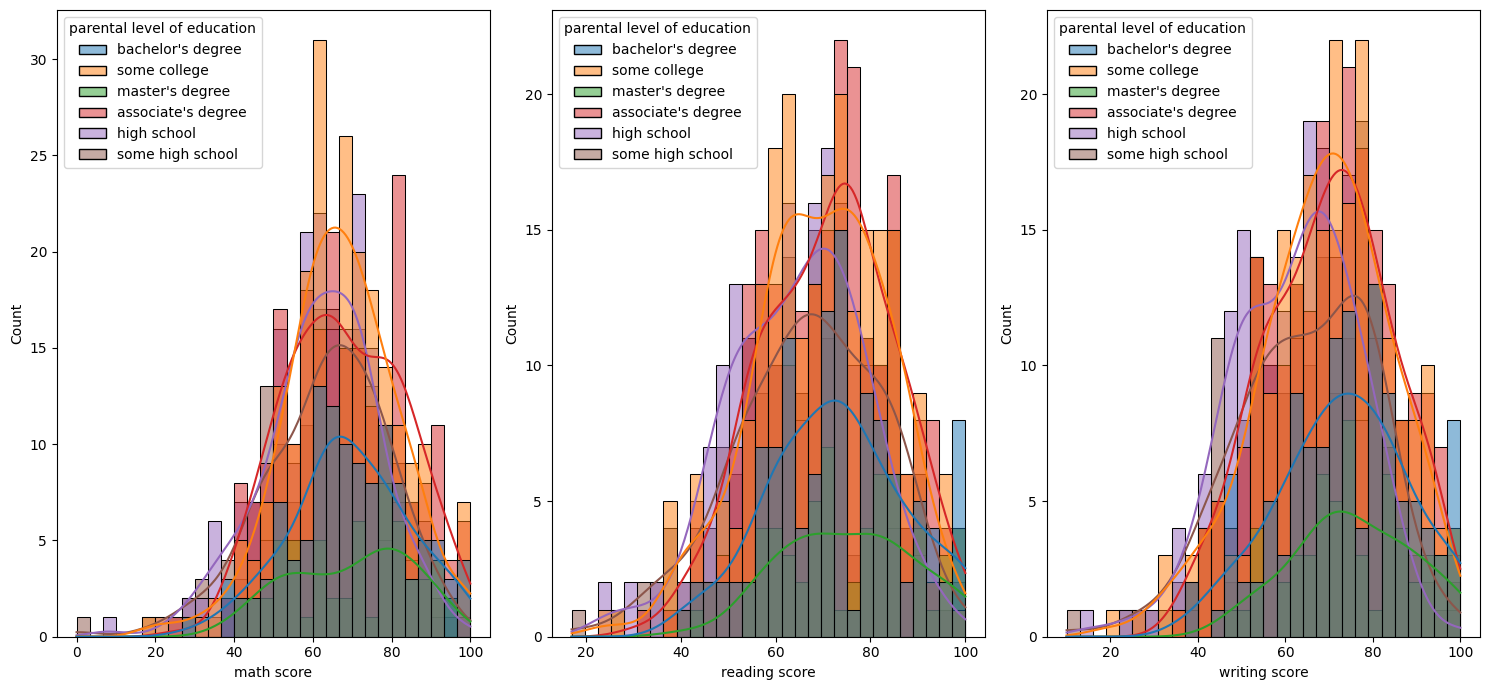

In [23]:
fig,axis = plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df,x='math score',bins=30,kde=True,color='g',hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df,x='reading score',bins=30,kde=True,color='r',hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df,x='writing score',bins=30,kde=True,hue='parental level of education')
plt.tight_layout()
plt.show()

- Children of parents with master's and bachelor's degree tend to perform better overall.

**Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?**

**Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?**

**Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?**